# Chapter 9 
# Support Vector Machines

SVM is a generalization of a simple and intuitive classifier called the _Maximal margin classifier_.

## Maximal Margin Classifier
__Hyperplane__ :- In a p-dimensional space, a flat affice subspace of dimension p-1. In 2 dimensional space, a hyperplane is a line. 

In 2-dimension space, a hyperplane is defined as $$\beta_0 + \beta_1 X_1 + \beta_2 X_2 = 0$$ for paramters $\beta_0, \beta_1 and \beta_2$.

Any $X = (X_1, X_2)^T$ for which above equation holds is a point on the hyperplane. In 2 dimension, a hyperplane is a line.

In case of p-dimension, a hyperplane $\beta_0 + \beta_1 X_1 +.....+ \beta_p X_p = 0$ defines a p-dimensional hyperplane.

Now, suppose that X does not satisfy the above equation. If $\beta_0 + \beta_1 X_1 +.....+ \beta_p X_p > 0$, then X lies to one side of the hyperplane and if $\beta_0 + \beta_1 X_1 +.....+ \beta_p X_p < 0$, then X lies on the other side of the hyperplane. 

So, a hyperplane is dividing p-dimensional space into 2 halves.

### Classification using a seperating Hyperplane:-

For a n X p data matrix X where all observations fall into two classes, $y_1,....,y_n\  \epsilon $ {-1,1} and a set of test observations $x^* = (x_1^*,....,x_p^*)$.

Goal is to develop a classifier based on training data that will correctly classify the test observation using its feature measurement.

__Seperating hyperplane__ :- Suppose it's possible to construct a hyperplane that seperates the training observations perfectly according to their class labels. Then a seperating hyperplane has the property that 
$$y_i(\beta_0 + \beta_1 X_{i1} +.....+ \beta_p X_{ip}) > 0$$ for all i = 1,2,...,n.

For test observation classification, we can look at sign of $f(x^*) = \beta_0 + \beta_1 X_1^* +.....+ \beta_p X_p^*$.
* If $f(x^*)$ is negetive, then class = -1.
* If $f(x^*)$ is positive, then class = 1.

We can use magnitude of $f(x^*)$. If $f(x^*)$ far from zero, $x^*$ lies far from hyperplane and we are more confident about our classification and vice versa.

### Maximal Margin Classifier
If our data can be perfectly seperated using a hyperplane, then there will be infinite number of such hyperplane because a given hyperplane can be shifted and rotated without touching any of the observation.
* Maximal margin hyperplane is a reasonable way to decide which of the infinite hyperplane to choose.
* We will compute the perpendicular distance from each training observation to a given seperating hyperplane; the smallest such distance is the minimal distance from the observation to the hyperplane and is known as __margin__.

Maximal Margin hyperplane is the seperating hyperplane for which margin is largest. We then classify the test observation based on what side of hyperplane these observations lies. In a sense, the maximal margin hyperplane represents the mid-line of the widest "slab" that we can insert between the two classes.

Maximal margin classifier is often successful, it can also led to overfitting when p is large.

An example of Maximal Margin Calssifier is presented below.

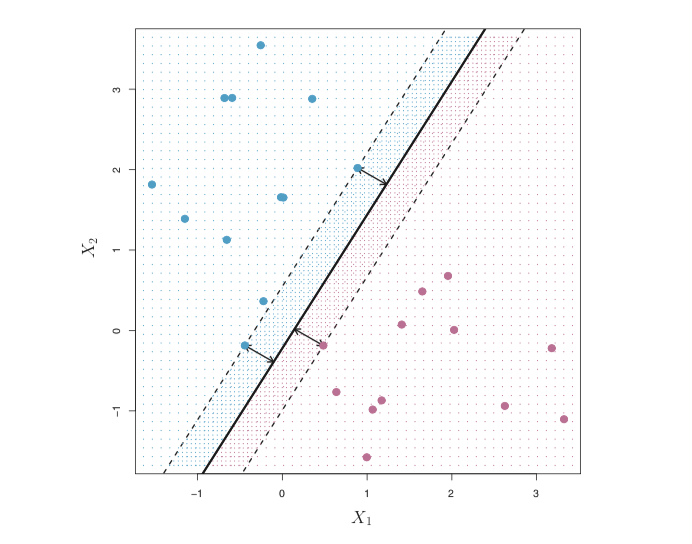

In [3]:
from IPython.display import Image
Image(filename = "/Users/atyagi/Desktop/ISLR Python Repo/ISLR_Notes_codes/Maximal Margin Classifier.png")

The points indicating the width of margin (or lies along the gutters of the road) are known as support vectors, since they are vector in p-dimensional space and they support the hyperplane in the sense that if these points moved slightly then the maximal margin hyperplane would move as well. Our hyperplane do not depend on any other observation.

__Construction of Maximal Margin Classifier__:-
The maximal margin hyperplane is the solution to the optimization problem.

*  $maximize_{\beta_0, \beta_1,...,\beta_p} M$.

__Constraints__ :-
    
1. subject to $\sum_{j = 1}^{p}\beta_j^2 = 1$.
2. $y_i(\beta_0 + \beta_1 X_{i1} +.....+ \beta_p X_{ip}) > M\ \ \ \forall\  i = 1,2,...,n.$

2nd contraint gurantees that each observation will be on the correct side of the hyperplane, provided that M is positive.

1st constraint add meaning to 2nd constraint, given the 1st constraint, the perpendicular distance from the observation to the hyperplane is $y_i(\beta_0 + \beta_1 X_{i1} +.....+ \beta_p X_{ip})$.

Constraints ensure that each point is on the correct side and at least M distance from hyperplane.


__The Non-seperable Case__ :-
In many cases no seperating hyperplane exists, and so there is no maximal margin classifier. So no solution with M > 0.

But we can extend the same concept to generalize maximal margin classifier to the non-seperable case, which is known as __Support Vector Classifier__.

__Disadvantage of Maximal Margin Classifier__ :-

* A classifier based on a seperating hyperplane will necessary perfectly classify all the trainign observations, this can lead to sensitivity to individual observations.
* Maximal margin hyperplane can be extremely sensitive to a change in a single observation suggest that it may have overfit the training data.

In this case, we might be willing to consider a classifier based on a hyperplane that does not perfectly seperate the two classes in the interest of 
1. Great robustness to individual observations.
2. Better classification of most of training observation.

## Support Vector Classifier
The support vector classifier sometime called a soft margin classifier.

* It allows some observations to be on the incorrect side of the margin or even the incorrect side of the hyperplane.(and the margin is soft i.e. it is tolerant of some violations).
* This approach is more practical because when there is no seperating hyperplane, such a situation is inevitable.
* Observations on the wrong side of the hyperplane are misclassified by the support vector classifier.

Support Vector classifier is a solution to the optimization problem
*  $maximize_{\beta_0, \beta_1,...,\beta_p,\epsilon_1,\epsilon_2,...,\epsilon_n} M$.

__Constraints__ :-
    
1. subject to $\sum_{j = 1}^{p}\beta_j^2 = 1$.
2. $y_i(\beta_0 + \beta_1 X_{i1} +.....+ \beta_p X_{ip}) > M(1-\epsilon_i)\ \ \ \forall\  i = 1,2,...,n.$
3. $\epsilon_1 \ge 0, \sum_{i = 1}^{n}\epsilon_i \le C.$

C is a non-negetive tuning parameter.

M = width of the margin (we seek this to be as large as possible).

$\epsilon_i$ = slack variables, that allow individual observations to be on the wrong side of the margin or the hyperplane. Classification of the test observation remains same as Maximal Margin classifier.

Slack variables tells us where the ith observation is located relative to the hyperplane and relative to the margin.
* If $\epsilon_i$ = 0, the ith observation is on the other side of the margin.
* If $\epsilon_i$ > 0, the ith observation is on the wrong side of the margin (violated the margin).
* If $\epsilon_i$ > 1, then it is on the wrong side of the hyperplane.

C(tuning paramter) :- It bounds the sum of $\epsilon_i$, so it determines severity of the violation to the margin that it will tolerate.
* C = 0, there is no budget for violations to the margin (Maximal Margin Classifier).
* C > 0, no more than C observations can be on the wrong side of the hyperplane (If observation is on the wrong side $\epsilon$ > 1 and $\sum_{i = 1}^{n}\epsilon_i \le C).$
* As C increases we become more tolerant of violations to the margin and vice versa. 
* C controls the bias-variance trade off. When C is small, we seek narrow margins, this leads to low bias but high variance. When C is large, we have wider margin, this leads to potentially more bias but may have lower variance.

In this optimization problem, only observations that either lie on the margin or that violate the margin will effect the hyperplane. The observation are called support vectors. No. of support vectors are controlled by C.

Support Vector Classifier is quite robust to the observation behaviour that are far from the hyperplane. Unlike LDA, that is sensitive to all of the observations.

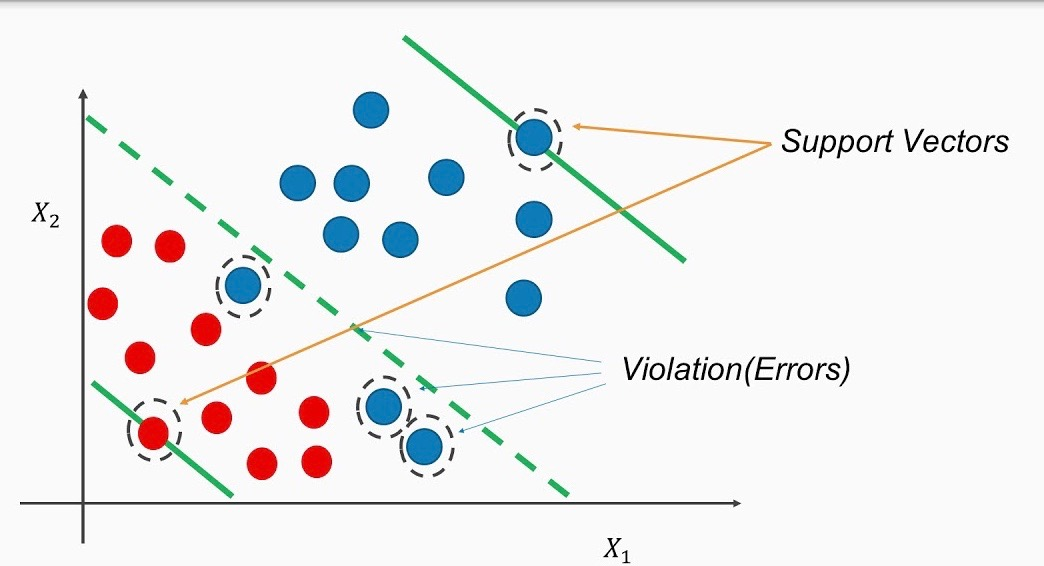

In [4]:
Image(filename = "/Users/atyagi/Desktop/ISLR Python Repo/ISLR_Notes_codes/Support Vector Classifier.jpg")

__Classification with Non-linear Decision Boundaries__

To address the problem of possible non-linear boundaries between, we can expand the feature space using quadratic, cubic and even higher-order polynomial functions of the predictors. For e.g. we can use 
$$X_1, X_1^2, X_2, X_2^2,...,X_p, X_p^2$$ for fitting a support vector classifier.

The decision boundary that result from using this new feature space will still be linear in new feature space but in the original feature space, the decision boundary becomes non-linear. Other functions of predictors can also be considered, but with large no. of features, computations become unmanageable.

## Support Vector Machines
SVM is an extension of the support vector classifier that results from enlarging the feature space in a specific way using kernels. 

In a support vector classifier problem the solution of the optimization problem involves only the inner products of the observations.

__Inner product <a,b> = $\sum_{i = 1}^{r}a_i b_i$__

Inner product of 2 observations is $<x_i x_i^{'}> = \sum_{j = 1}^{p}x_{ij}x_{i^{'} j}$. 

1. A linear support vector classifier can be represented as $$f(x) = \beta_0 + \sum_{i=1}^{n}\alpha_i <x,x_i>$$

where there are n parameters $\alpha_i$, i = 1,2,....,n one per training observations.
2. To estimate the parameters $\alpha_1, \alpha_2, ... , \alpha_n$ and $\beta_0$, all we need are the $nC2$ inner products $<x_i x_i^{'}>$ between all pairs of training observations.

To evaluate f(x), we need to compute the inner product between the new point x and each of the training points $x_i$. However, it turns out that $\alpha_i$ is non-zero only for the support vectors in the solution, otherwise 0. We can write $$f(x) = \beta_0 + \sum_{i\epsilon S} \alpha_i<x,x_i>$$
S = support vector indices.

__Kernels__ :- Every time the inner product appears we can replace it with a generalization of the inner product $$K(x_i,x_{i^{'}})$$
K is some function that we call a kernel. A kernel is a function that we call a kernel. A kernel is a function that quantifies the similarity of 2 observations.
$$K(x_i,x_{i^{'}}) = \sum_{j = 1}^{p} x_{ij} x_{i^{'}j}\ \ (linear\ kernel)$$
Linear kernel quantifies the similarity of a pair of observation using Pearson (standard) correlation. We can use $$K(x_i,x_{i^{'}}) = (1 + \sum_{j = 1}^{p} x_{ij} x_{i^{'}j})^d$$
This is called as a polynomial kernel of degree d, where d is a positive integer.

Using such kernel with d > 1 will lead to a much more flexible boundaries. This is equivalent to fitting a support vector classifier in a high - dimensional space involving polynomial of degree n.

__SVM = Support Vector Classifier + Non-linear Kernel.__

A radial Kernel
$$K(x_i,x_{i^{'}}) = exp(- \gamma \sum_{j = 1}^{p}(x_{ij} - x_{i^{'}j})^2)$$
where $\gamma$ is a positive constant.

If a given test observation $x^* = (x_1^*,....,x_p^*)$ is far from training observation $x_i$ in terms of Euclidean distance and so $K(x_i,x_{i^{'}}) = exp(- \gamma \sum_{j = 1}^{p}(x_{j}^* - x_{ij})^2)$ will be very tiny. This means that $x_i$ will play virtually no role in $f(x^*)$. This means that the radial kernel has very local behaviour in the sense that only nearby observation have an effect on the class lable of a test observation.

__Advantage of a kernel__:-
* Computational advantage, kernel only compute $K(x_i,x_{i^{'}})$ for $nC2$ distant pair of $i,i^{'}$.
* For some kernel like radial kernel, feature is implicit and infinite dimensional, so we could never do the computations there anyway.
* As $\gamma$ increase, fit becomes more non-linear.

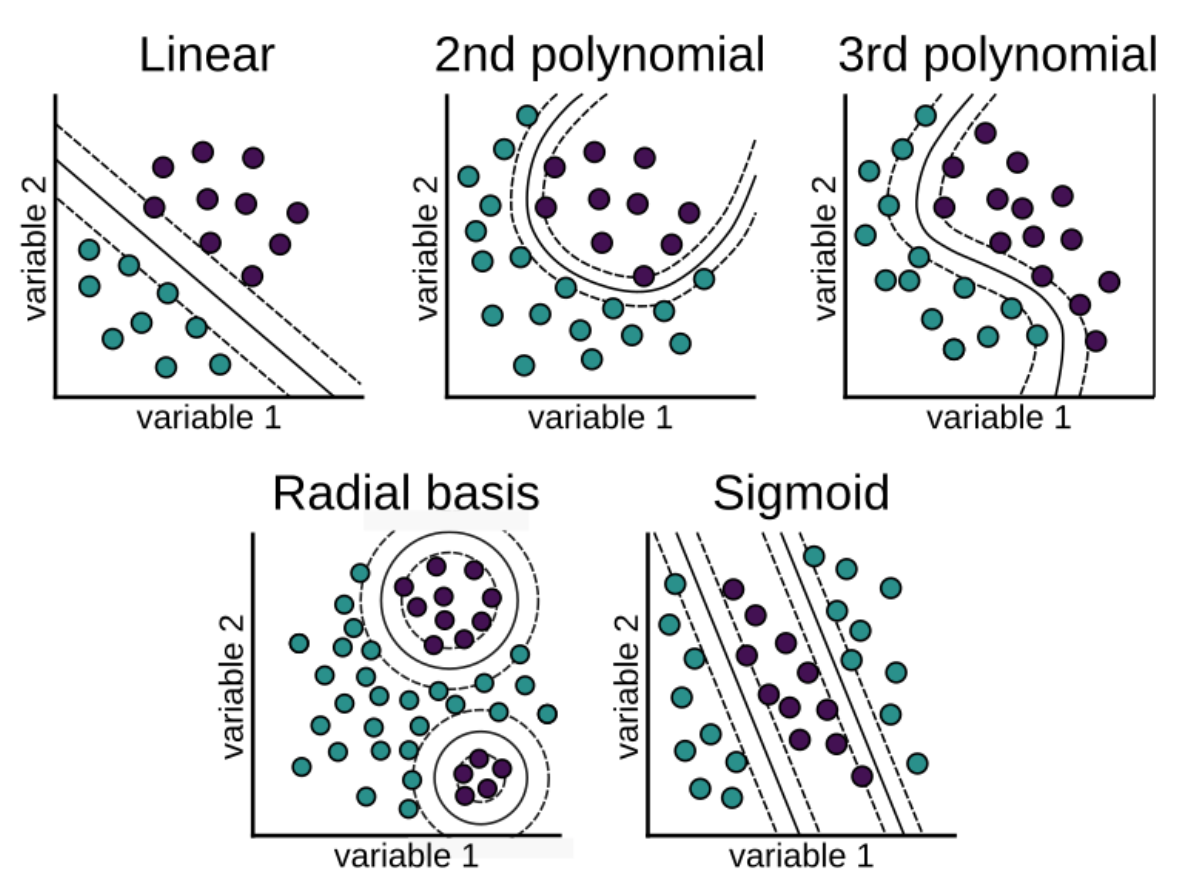

In [5]:
Image(filename = "/Users/atyagi/Desktop/ISLR Python Repo/ISLR_Notes_codes/SVM with non linear Kernel.png")

## Support Vector with more than 2 classes
SVM does not naturally extends to multi class classification.
### One-vs-one Classification
For k >2. A one-vs-one or all pair approach constructs $(kC2)$ SVMs each of which compares a pair of classes. For e.g. one pair might compair K and $k^{'}$th class.

We classify each observation using each $(kC2)$ classifier and we tally the no. of times that the test observation is assigned to each of the k classes.

### One-vs-all. Classification
We fit K SVMs, each time comparing one of K classes to the remaining K-1 classes. Let $\beta_{0K}, \beta_{1K},...,\beta_{pK}$ denote the parameters coming from one of the K SVMs. 

Let $x^*$ denotes a test observation. We assign the observation to the class for which $\beta_{0K} + \beta_{1K}x_1^*+...+\beta_{pK}x_p^*$ is largest as this amounts to a high level of confidence that the test observation belongs to Kth class rather than any of the other class.

## Relationship to Logistic Regression
We can write the optimization algorithm of SVM for $f(x) = \beta_0 + \beta_1 X_1 +....+ \beta_pX_p$ as 
$$minimize_{\beta_0,\beta_1,..,\beta_p}(\sum_{i = 1}^{n} max[0,1 - y_i f(x_i)] + \lambda \sum_{j = 1}^{p}\beta_j^2)$$
where $\lambda$ is a non-negetive tuning parameter. $\lambda$ is equivalent to C (is SV classifier). 

Here $\lambda \sum_{j = 1}^{p}\beta_j^2$ is a ridge penalty. Hence the above form becomes a "Loss + Penalty" form.

The loss function for SVM $$L(X,y,\beta) = \sum_{i = 1}^{n} max[0,1 - y_i(\beta_0 + \beta_1x_{i1} + ... + \beta_px_{ip}]$$
This is known as hinge loss. Hinge loss is closely related to loss function of logistic regression.

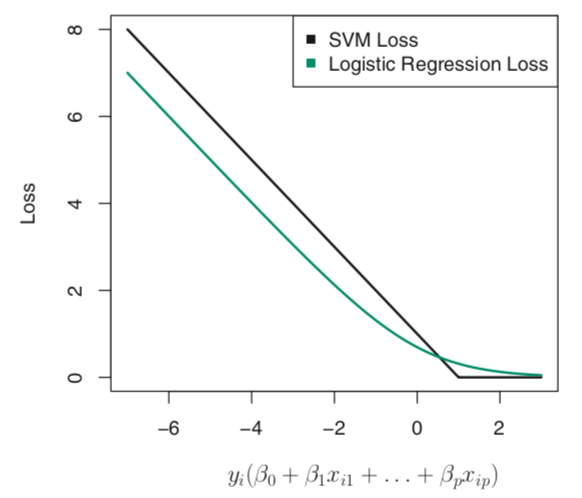

In [7]:
Image(filename = "/Users/atyagi/Desktop/ISLR Python Repo/ISLR_Notes_codes/SVM vs logistic.png")

As we can see above that loss function of SVM takes a value 0 for $y_i(\beta_0 + \beta_1x_{i1} + ... +\beta_px_{ip}) \ge 1$(values on correct side of the margin. The cost function of logistic regression do not becomes 0 but is very small for observations far from the decision boundary.

* When the classes are well seperated, SVM tends to do better and if the class are not well seperated then logistic regression is often preferred.
* We can perform logistic regression as well with non-linear kernels.

## Support Vector Rgression
It seeks coefficients that minimizes a different type of loss, where only residuals larger in absolute value than some positive constant contribute to the loss function.

This is an extension of the margin used in Support Vector Classifier to the regression setting.

## Lab: Support Vector Machines
### Support Vector Classifier

In [162]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.svm as svm
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, plot_roc_curve, auc

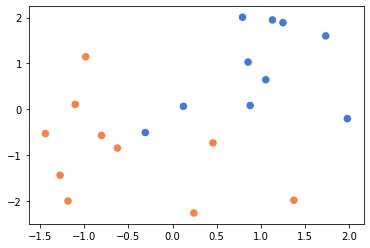

In [11]:
random.seed(1)
x = np.random.normal(0,1,(20,2))
y = [-1]*10 + [1]*10
x[:10] = x[:10] + 1
# Plotting the data created above to check if they are linearly seperable.
sns.scatterplot(x = x[:,0], y = x[:,1], hue = y, s= 70, palette = "muted",legend = False)
plt.show()

The data is not linearly seperable. We will now fit a Support Vector Classifier.

In [12]:
X = np.array(x)
y = np.array(y)
svc = svm.LinearSVC(C =1000, random_state = 1).fit(X,y)

/Users/ankittyagi/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


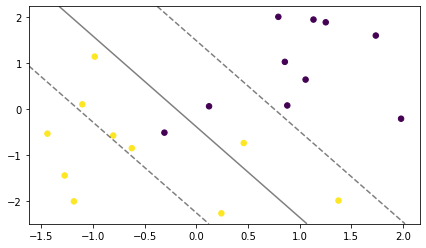

In [13]:
plt.figure(figsize = (7,4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
plt.show()

We can do a cross validation to select the value of C. 

In [26]:
CV_score = list()
CV_std = list()
svc = svm.SVC(kernel = "linear",random_state = 1)
for i in [0.001, 0.01, 0.1, 1, 5, 10, 100]:
    svc.C = i
    score = cross_val_score(svc, X, y, cv = 10)
    CV_score.append(np.mean(score))
    CV_std.append(np.std(score))

In [31]:
np.column_stack((CV_score, CV_std))

array([[0.9       , 0.2       ],
       [0.9       , 0.2       ],
       [0.9       , 0.2       ],
       [0.8       , 0.33166248],
       [0.9       , 0.2       ],
       [0.85      , 0.22912878],
       [0.85      , 0.22912878]])

The value of the corresponding to the best performance is 1. We can also use the Grid Search for selecting C.

In [44]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 5, 10, 100]}
svc = svm.SVC(kernel = "linear",random_state = 1)
clf = GridSearchCV(svc, parameters, cv = 10).fit(X,y)
clf.best_params_

{'C': 0.001}

According to the GridSearchCV, 0.001 is best. This is because of the high variability in the result of C = 1.
Now we will predict for some test observations.

In [47]:
clf.cv_results_['mean_test_score']

array([0.9 , 0.9 , 0.9 , 0.8 , 0.9 , 0.85, 0.85])

In [53]:
x_test = np.random.normal(0,1,(20,2))
y_test = [-1]*10 + [1]*10
x[:10] = x[:10] + 1
X_test = np.array(x_test)
y_test = np.array(y_test)
print(confusion_matrix(y_test, clf.predict(X_test), labels = [-1,1]))
print(classification_report(y_test, clf.predict(X_test)))

[[5 5]
 [4 6]]
              precision    recall  f1-score   support

          -1       0.56      0.50      0.53        10
           1       0.55      0.60      0.57        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20



We have a precision of 0.56. We will now try with a different value of C.

In [63]:
svc = svm.SVC(kernel = "linear",random_state = 1, C = 100).fit(X,y)
print(confusion_matrix(y_test, svc.predict(X_test), labels = [-1,1]))
print(classification_report(y_test, svc.predict(X_test)))

[[5 5]
 [3 7]]
              precision    recall  f1-score   support

          -1       0.62      0.50      0.56        10
           1       0.58      0.70      0.64        10

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20



Our precision and recall matrix has performed better than when C = 0.001. 

### Support Vector Machines
Now we will try SVM with non-linear kernel.

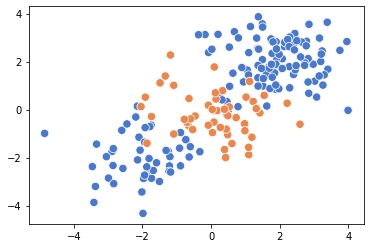

In [67]:
x = np.random.normal(0,1,(200,2))
y = [1]*150 + [2]*50
x[:100] = x[:100] + 2
x[101:150] = x[101:150] - 2
# Plotting the data created above to check if they are linearly seperable.
sns.scatterplot(x = x[:,0], y = x[:,1], hue = y, s= 70, palette = "muted",legend = False)
plt.show()

In [104]:
X = np.array(x)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.5)
svmfit = svm.SVC(kernel = "rbf",random_state = 1, C = 1.0, gamma = 1).fit(X_train,y_train)
svmfit.support_vectors_.shape

(52, 2)

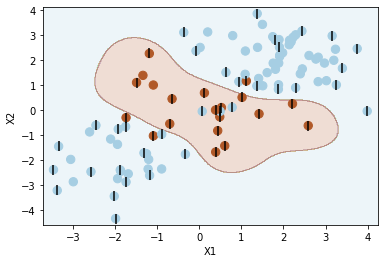

Number of support vectors:  52


In [105]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)
plot_svc(svmfit, X_train, y_train)

We will choose a bigger value of C to allow for more flexibility.

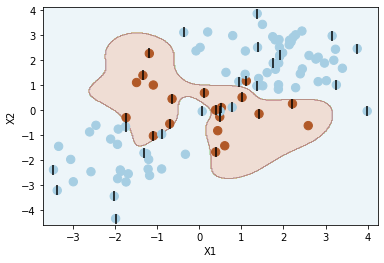

Number of support vectors:  36


In [106]:
svmfit = svm.SVC(kernel = "rbf",random_state = 1, C = 100, gamma = 1).fit(X_train,y_train)
plot_svc(svmfit, X_train, y_train)

We will find out the best combination using Grid Search CV with cv = 10.

In [134]:
parameters = {'C':[0.01, 0.1, 1, 10, 100],'gamma':[0.5,1,2,3,4]}
svmfit = svm.SVC(kernel = "rbf",random_state = 1)
clf = GridSearchCV(svmfit, parameters, cv = 10, scoring = "accuracy").fit(X,y)
clf.best_params_

{'C': 1, 'gamma': 0.5}

In [133]:
result = {tuple(clf.cv_results_['params'][i].values()) : clf.cv_results_['mean_test_score'][i] for i in range(len(clf.cv_results_['params']))}
{k: v for k, v in sorted(result.items(), key=lambda item: item[1], reverse = True)}

{(1, 0.5): 0.89,
 (10, 0.5): 0.89,
 (1, 1): 0.885,
 (1, 2): 0.885,
 (100, 0.5): 0.885,
 (1, 3): 0.8700000000000001,
 (10, 2): 0.8700000000000001,
 (10, 1): 0.8699999999999999,
 (1, 4): 0.865,
 (10, 3): 0.865,
 (100, 1): 0.865,
 (10, 4): 0.8600000000000001,
 (0.1, 0.5): 0.85,
 (100, 2): 0.8400000000000001,
 (100, 3): 0.8150000000000001,
 (100, 4): 0.8150000000000001,
 (0.1, 1): 0.805,
 (0.01, 0.5): 0.75,
 (0.01, 1): 0.75,
 (0.01, 2): 0.75,
 (0.01, 3): 0.75,
 (0.01, 4): 0.75,
 (0.1, 2): 0.75,
 (0.1, 3): 0.75,
 (0.1, 4): 0.75}

In [146]:
# Test data accuracy
print(confusion_matrix(y_test, clf.predict(X_test), labels = [1,2]))
print(classification_report(y_test, clf.predict(X_test)))
print("Miss Classification Rate :", sum(y_test != clf.predict(X_test))/100)

[[65  5]
 [ 4 26]]
              precision    recall  f1-score   support

           1       0.94      0.93      0.94        70
           2       0.84      0.87      0.85        30

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.89       100
weighted avg       0.91      0.91      0.91       100

Miss Classification Rate : 0.09


### ROC Curve

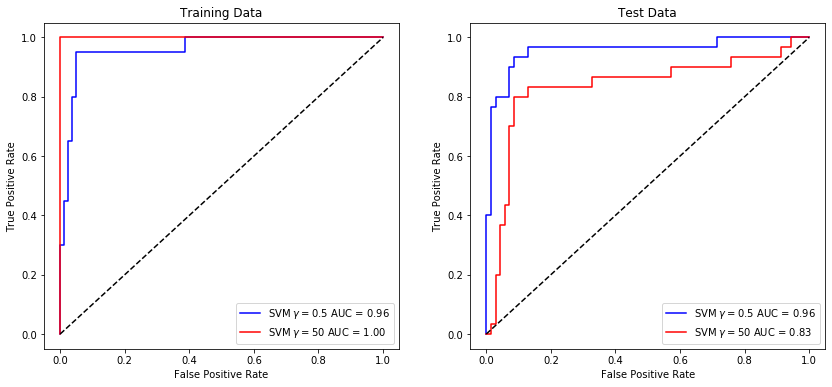

In [184]:
# Curve for the gamma = 0.5
fpr1, tpr1,_ = roc_curve(y_train, clf.decision_function(X_train), pos_label = 2)
roc_auc1 = auc(fpr1, tpr1)

svmfit = svm.SVC(kernel = "rbf",random_state = 1, gamma = 50).fit(X_train,y_train)

fpr2, tpr2,_ = roc_curve(y_train, svmfit.decision_function(X_train), pos_label = 2)
roc_auc2 = auc(fpr2, tpr2)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(fpr1, tpr1, label='SVM $\gamma = 0.5$ AUC = %0.2f' % roc_auc1, color='b')
ax1.plot(fpr2, tpr2, label='SVM $\gamma = 50$ AUC = %0.2f' % roc_auc2, color='r')
ax1.plot([0, 1], [0, 1], 'k--')
ax1.legend()
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Training Data')

fpr3, tpr3,_ = roc_curve(y_test, clf.decision_function(X_test), pos_label = 2)
roc_auc3 = auc(fpr3, tpr3)

fpr4, tpr4,_ = roc_curve(y_test, svmfit.decision_function(X_test), pos_label = 2)
roc_auc4 = auc(fpr4, tpr4)

ax2.plot(fpr3, tpr3, label='SVM $\gamma = 0.5$ AUC = %0.2f' % roc_auc3, color='b')
ax2.plot(fpr4, tpr4, label='SVM $\gamma = 50$ AUC = %0.2f' % roc_auc4, color='r')
ax2.plot([0, 1], [0, 1], 'k--')
ax2.legend()
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Test Data')
plt.show()

We can see that more local boundary (high value of gamma) result in higher AUC in training data but smaller in the test data comparing to a less flexible boundary.